In [1]:
import pandas as pd


In [2]:
# pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [3]:
from chembl_webresource_client.new_client import new_client

targets=new_client.target.filter(target_chembl_id='CHEMBL233')
targets=pd.DataFrame.from_dict(targets)
targets.columns

Index(['cross_references', 'organism', 'pref_name', 'species_group_flag',
       'target_chembl_id', 'target_components', 'target_type', 'tax_id'],
      dtype='object')

In [4]:
data=new_client.activity.filter(target_chembl_id='CHEMBL233').filter(standard_type="IC50")
df=pd.DataFrame.from_dict(data)
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

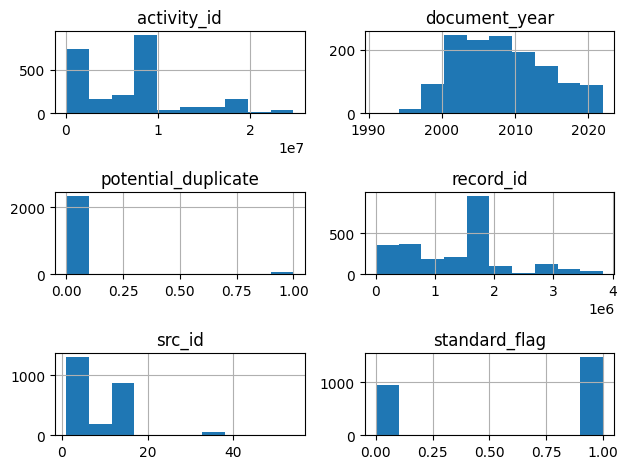

In [5]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()
plt.show()

In [6]:
df2=df[df.standard_value.notna()]
df2=df2[df2.canonical_smiles.notna()]
df2=df2.drop_duplicates(['canonical_smiles'])
df2.columns
selection=['molecule_chembl_id','canonical_smiles','standard_value']
df3=df2[selection]
df3.head


<bound method NDFrame.head of      molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL423694     CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1   
1          CHEMBL278078       CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1   
2           CHEMBL13470  C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...   
3          CHEMBL127802   CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1   
4          CHEMBL126946      CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1   
...                 ...                                                ...   
2405      CHEMBL5083458  c1cnc2c(c1)CN[C@@H](CN(CCCCNC1COC1)[C@H]1CCCc3...   
2406      CHEMBL5081505  c1cnc2c(c1)CN[C@@H](CN(CCCC1CCNCC1)[C@H]1CCCc3...   
2407      CHEMBL5082142  c1cnc2c(c1)CN[C@@H](CN(CCCCN1CCOCC1)[C@H]1CCCc...   
2408       CHEMBL518924        NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21   
2409      CHEMBL5092058  Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...   

     standard_value  
0          

In [9]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))

df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.8 MB/s eta 0:00:00


<ipython-input-9-64d422a6481a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))
<ipython-input-9-64d422a6481a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))


In [10]:
df3.head


<bound method NDFrame.head of      molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL423694     CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1   
1          CHEMBL278078       CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1   
2           CHEMBL13470  C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...   
3          CHEMBL127802   CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1   
4          CHEMBL126946      CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1   
...                 ...                                                ...   
2405      CHEMBL5083458  c1cnc2c(c1)CN[C@@H](CN(CCCCNC1COC1)[C@H]1CCCc3...   
2406      CHEMBL5081505  c1cnc2c(c1)CN[C@@H](CN(CCCC1CCNCC1)[C@H]1CCCc3...   
2407      CHEMBL5082142  c1cnc2c(c1)CN[C@@H](CN(CCCCN1CCOCC1)[C@H]1CCCc...   
2408       CHEMBL518924        NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21   
2409      CHEMBL5092058  Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...   

     standard_value              

In [11]:
import seaborn as sns


['intermediate' 'active' 'inactive']


<ipython-input-12-a4d8dd9773f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bioactivity_threshold'] = df3['standard_value'].apply(lambda x: 'active' if float(x) < 1000 else ('inactive' if float(x)  > 10000 else 'intermediate'))


<Axes: xlabel='bioactivity_threshold', ylabel='count'>

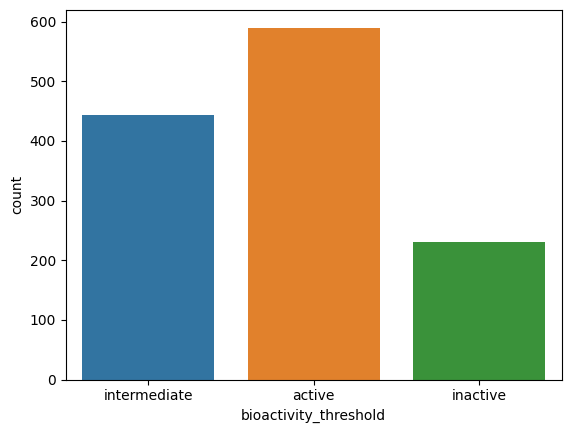

In [12]:
df3['bioactivity_threshold'] = df3['standard_value'].apply(lambda x: 'active' if float(x) < 1000 else ('inactive' if float(x)  > 10000 else 'intermediate'))
print(df3['bioactivity_threshold'].unique())
sns.countplot(x='bioactivity_threshold', data=df3)

In [13]:
import numpy as np 
df3['plC50']= df3['standard_value'].apply(lambda x: -np.log10(float(x)))

<ipython-input-13-e35d1889a219>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['plC50']= df3['standard_value'].apply(lambda x: -np.log10(float(x)))


In [14]:
nan_row = df3[df3['plC50'].isna()].index
print(nan_row)
df3= df3.drop(index=nan_row)
print(df3.shape)

Int64Index([2126], dtype='int64')
(1262, 7)


In [15]:
X= df3['canonical_smiles_fingerprints'].to_numpy()
Y= df3['plC50'].to_numpy()

In [16]:
print(X)
print(Y)

 ...
[-3.7201593  -3.54157924 -2.50514998 ... -4.47712125 -4.07918125
 -1.        ]


In [17]:
final_data= np.vstack((X, Y))
final_data= final_data.T
final_data= pd.DataFrame(final_data)

In [18]:
final_data.head

<bound method NDFrame.head of                                                       0         1
0     [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ... -3.720159
1     [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ... -3.541579
2     [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...  -2.50515
3     [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...  -3.61595
4     [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...      -4.0
...                                                 ...       ...
1257  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ... -4.322219
1258  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ... -4.477121
1259  [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ... -4.477121
1260  [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, ... -4.079181
1261  [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...      -1.0

[1262 rows x 2 columns]>

In [19]:
m=len(final_data[0])
n=len(final_data[0][0])
print(m,n)

1262 2048


In [20]:
FP = np.zeros((m,n),dtype=int)
for i in range(m):
  for j in range(n):
    FP[i,j] = int(final_data[0][i][j])


In [21]:
print(FP.shape)
print(Y.shape)
Y=Y.reshape(-1,1)
print(Y.shape)
model_data=np.concatenate((FP,Y),axis=1)
print(model_data.shape)

(1262, 2048)
(1262,)
(1262, 1)
(1262, 2049)


In [22]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
# import plotly.graph_objects as go
import random

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(FP,Y,test_size=0.2)
xgb_r=xg.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)


In [24]:
print(X_test.shape)
xgb_r.fit(X_train,Y_train)
Y_pred=xgb_r.predict(X_test)





(253, 2048)


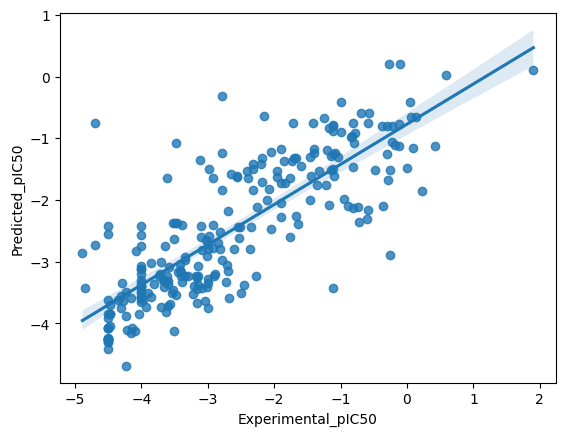

In [25]:

Y_test=np.squeeze(Y_test)

import matplotlib.pyplot as plt
ax=sns.regplot(x=Y_test,y=Y_pred)
ax.set_xlabel('Experimental_pIC50')
ax.set_ylabel('Predicted_pIC50')
plt.savefig('prediction_plot.pdf')
plt.show()



In [26]:
error=MSE(Y_test,Y_pred)
print(error)

0.6923846085053568


In [41]:
def ActiveLearning(X,Y,method,batch_size):
    print(method)
    initial_index=np.random.choice(range(len(X)), size=100, replace=False)
    X_train=X[initial_index]
    Y_train=Y[initial_index]

    rest_indices = np.setdiff1d(range(len(X)),initial_index)
    X_pool=X[rest_indices]
    Y_pool=Y[rest_indices]

    xgb_r=xg.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)
    xgb_r.fit(X_train,Y_train)
    Y_pred=xgb_r.predict(X_pool)
    error=MSE(Y_pool,Y_pred)
    test_error=[error]
    
    initial_model_error= cross_val_score(xgb_r, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    val=[abs(np.mean(initial_model_error))]

    while len(X_train)<1000:
        if method=='uncertainty':
            booster=xgb_r.get_booster()
            n=X_pool.shape[0]
            uncertain_list=[0]*n
            individual_preds=[]
            for tree_ in booster:
                individual_preds.append(
                    tree_.predict(xg.DMatrix(X_pool))
                )
            individual_preds=np.vstack(individual_preds)
            pred_var=np.var(individual_preds,axis=0)
            sorted_indices = np.argsort(pred_var)
    
            # Slice the sorted indices to get the last n indices
            indices = sorted_indices[-(batch_size):]
        elif method=='random':
            indices=list(range(batch_size))
        selectionx=X_pool[indices,:]
        selectiony=Y_pool[indices]
        X_pool = np.delete(X_pool, indices,axis=0)
        Y_pool = np.delete(Y_pool, indices,axis=0)

        # selectiony= np.reshape(selectiony, (1, 1))
        X_train=np.concatenate((X_train,selectionx))
        Y_train=np.concatenate((Y_train,selectiony))

        xgb_r=xg.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)
        xgb_r.fit(X_train,Y_train)
        Y_pred=xgb_r.predict(X_pool)
        error=MSE(Y_pool,Y_pred)
        test_error.append(error)
        
        val_error= cross_val_score(xgb_r, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        val.append(abs(np.mean(val_error)))
    print(test_error,val)
    return test_error,val

def Simulate(X,Y,n_rounds,batch_size):
    UNS_test_error=[]
    UNS_val=[]
    random_test_error=[]
    random_val=[]

    for i in range(n_rounds):
        print(i)
        np.random.seed(i)
        test_error,val=ActiveLearning(X,Y,'uncertainty',batch_size=batch_size)
        UNS_test_error.append(np.array(test_error))
        UNS_val.append(np.array(val))
        test_error,val=ActiveLearning(X,Y,'random',batch_size=batch_size)
        random_test_error.append(np.array(test_error))
        random_val.append(np.array(val))

    UNS_test_error=np.vstack(UNS_test_error)
    UNS_val=np.vstack(UNS_val)
    UNS_test_error_mean=np.mean(UNS_test_error,axis=0)
    UNS_test_error_std=np.std(UNS_test_error,axis=0)
    UNS_val_mean=np.mean(UNS_val,axis=0)
    UNS_val_std=np.std(UNS_val,axis=0)

    random_test_error=np.vstack(random_test_error)
    random_val=np.vstack(random_val)
    random_test_error_mean=np.mean(random_test_error,axis=0)
    random_test_error_std=np.std(random_test_error,axis=0)
    random_val_mean=np.mean(random_val,axis=0)
    random_val_std=np.std(random_val,axis=0)

    return UNS_test_error_mean,UNS_test_error_std,UNS_val_mean,UNS_val_std,random_test_error_mean,random_test_error_std,random_val_mean,random_val_std
rounds=10
batchsize=30
UNS_test_error_mean,UNS_test_error_std,UNS_val_mean,UNS_val_std,random_test_error_mean,random_test_error_std,random_val_mean,random_val_std=Simulate(FP,Y,rounds,batchsize)

        


            


0
uncertainty
[1.4638141032734204, 1.5117323135029166, 1.449491700531717, 1.5337025689799337, 1.4458164706672423, 1.5130002715469923, 1.570968866110375, 1.5717702676589296, 1.6269899990807721, 1.6539775086425057, 1.5802517644240521, 1.7734509994159096, 1.7415535590200926, 1.6170677480577358, 1.608078051151357, 1.5665233097049034, 1.5163626786847288, 1.5310459616004637, 1.652853987736641, 1.432613583941044, 1.5135768138274857, 1.3863140124494406, 1.3258662946090933, 1.3358299451769662, 1.428886252391669, 1.276587714689023, 1.2716108472218477, 1.3612169464038002, 1.0757659743901307, 1.216665278859913, 1.065858102949933] [1.557356625879533, 1.742354923134819, 1.1182459437078944, 1.0031215471921153, 1.0702492133629655, 0.9887696209024966, 0.7983011502418212, 0.7901965996157143, 0.761549619238721, 0.8987164306925022, 0.9255557059303321, 0.7809870336527551, 1.096610398378337, 1.035549608495693, 1.2529888686005328, 1.0416892882474698, 1.290644582394341, 1.0055522462691298, 0.9647418895908946,

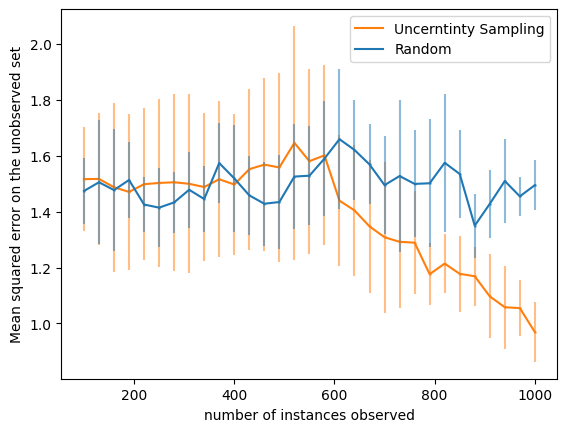

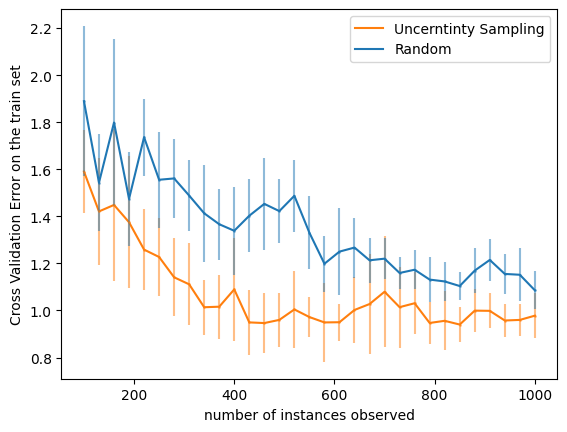

In [43]:

list_number=range(100,1000+batchsize,batchsize)
plt.plot(list_number,UNS_test_error_mean,color='tab:orange',label='Uncerntinty Sampling')
plt.legend(loc ="upper right")
plt.errorbar(list_number,UNS_test_error_mean,yerr = UNS_test_error_std,fmt ='o',color='tab:orange',markersize=1,alpha=0.5)

plt.plot(list_number,random_test_error_mean,color='tab:blue',label='Random')
plt.legend(loc ="upper right")
plt.errorbar(list_number,random_test_error_mean,yerr = random_test_error_std,fmt ='o',color='tab:blue',markersize=1,alpha=0.5)

plt.xlabel('number of instances observed')
plt.ylabel('Mean squared error on the unobserved set')
plt.show()

plt.plot(list_number,UNS_val_mean,color='tab:orange',label='Uncerntinty Sampling')
plt.legend(loc ="upper right")
plt.errorbar(list_number,UNS_val_mean,yerr = UNS_val_std,fmt ='o',color='tab:orange',markersize=1,alpha=0.5)

plt.plot(list_number,random_val_mean,color='tab:blue',label='Random')
plt.legend(loc ="upper right")
plt.errorbar(list_number,random_val_mean,yerr = random_val_std,fmt ='o',color='tab:blue',markersize=1,alpha=0.5)

plt.xlabel('number of instances observed')
plt.ylabel('Cross Validation Error on the train set')
plt.show()
